In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [79]:
df = pd.read_csv("/content/Breast Cancer Wisconsin (Diagnostic) Data Set .csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [80]:
df.shape

(569, 33)

In [81]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [83]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [86]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [87]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [88]:
numeric_data = df.select_dtypes(include=['number']).columns

In [89]:
categorical_data = df.select_dtypes(include=['object']).columns
df[categorical_data]

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


# **Numerical Features**

In [90]:
df[numeric_data].columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Text(0.5, 0.98, 'Numerical Features')

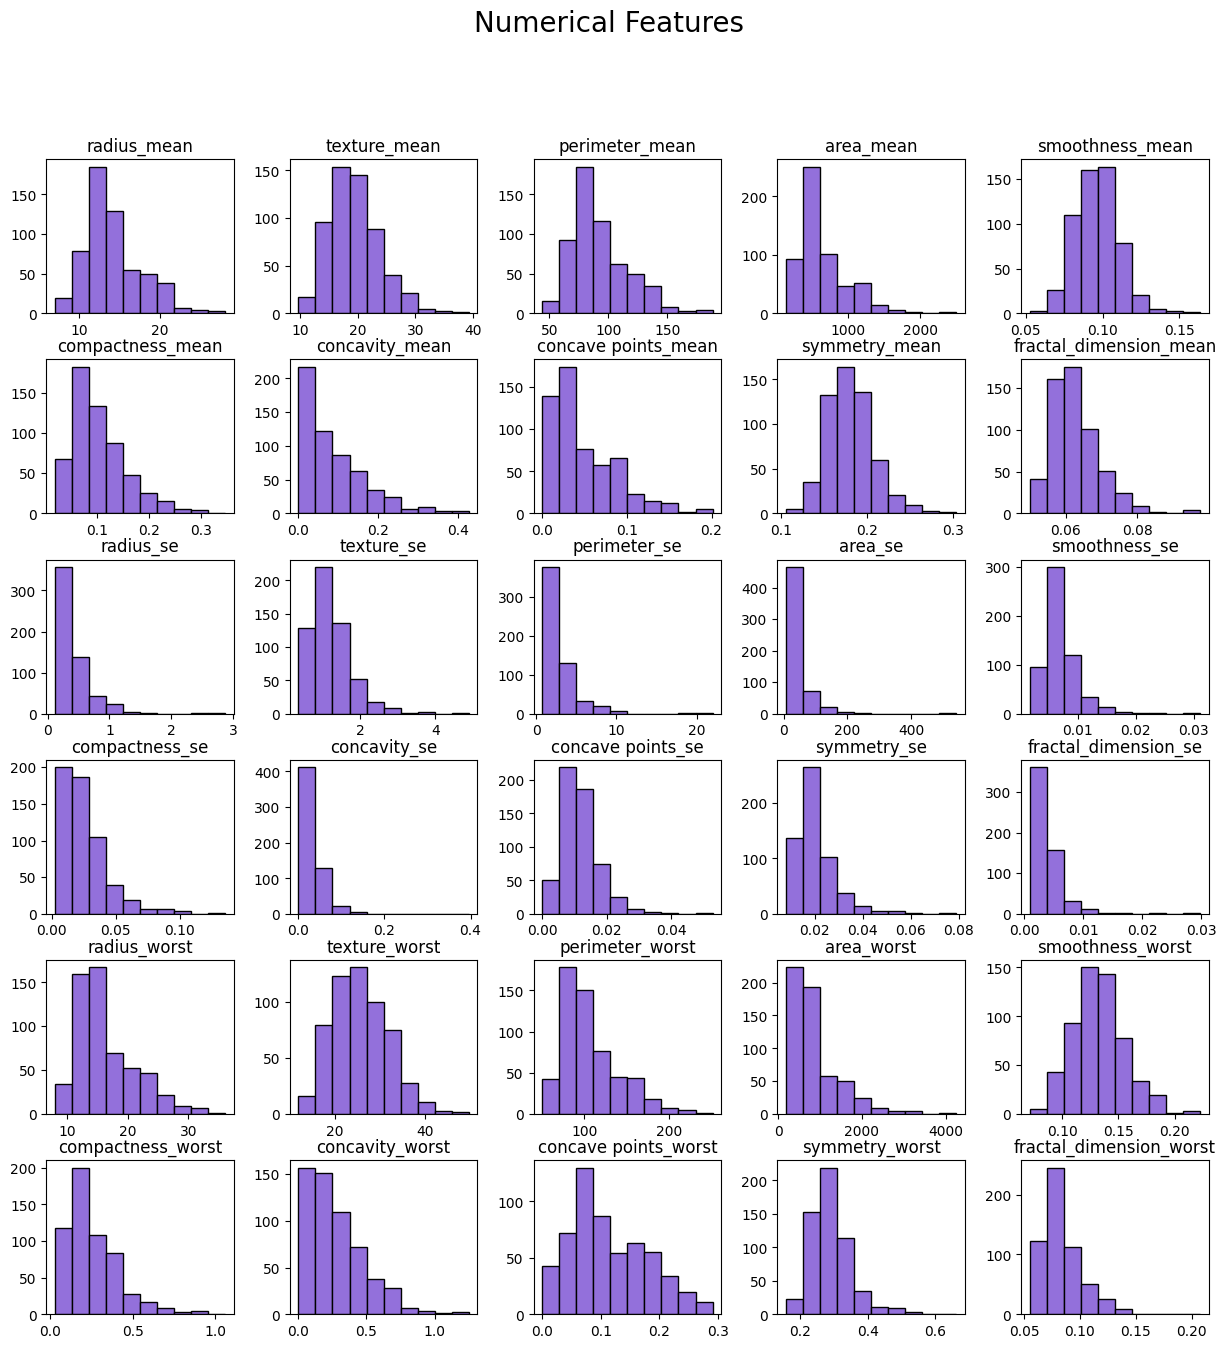

In [91]:
df[numeric_data].hist(figsize=(15,15), color='mediumpurple', edgecolor='black', grid=False)
plt.suptitle('Numerical Features', fontsize=20)

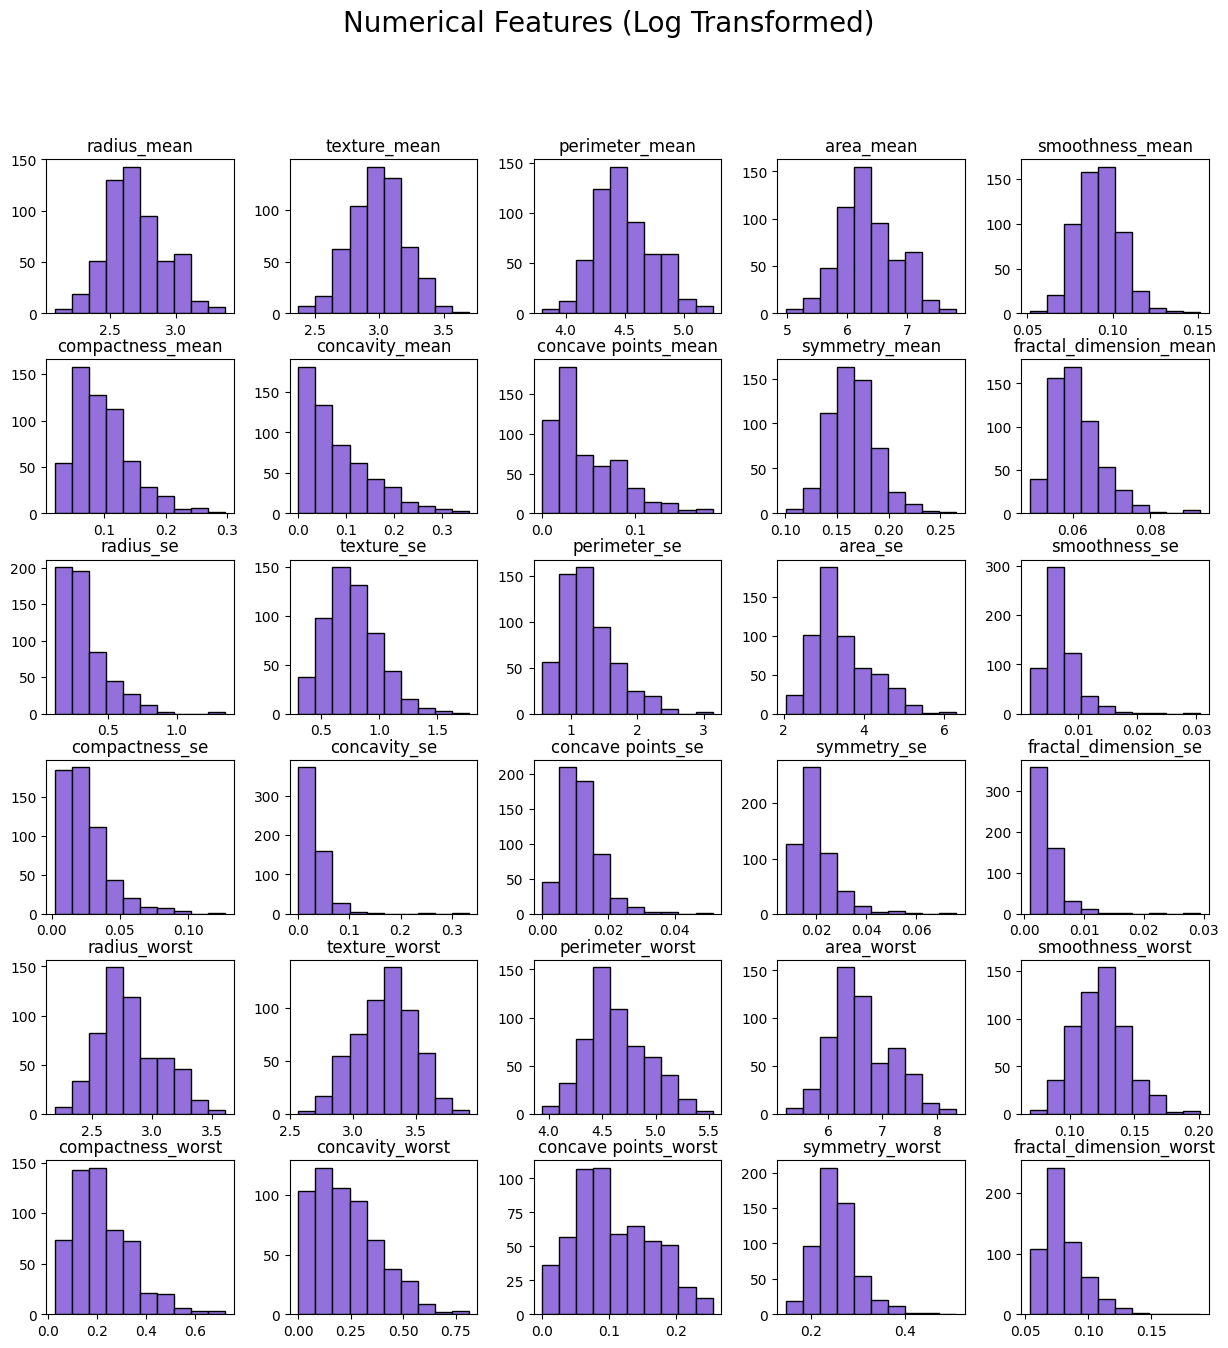

In [92]:
df_log = df[numeric_data].apply(lambda x: np.log1p(x))

# Plot histograms again
df_log.hist(figsize=(15,15), color='mediumpurple', edgecolor='black', grid=False)
plt.suptitle('Numerical Features (Log Transformed)', fontsize=20)
plt.show()

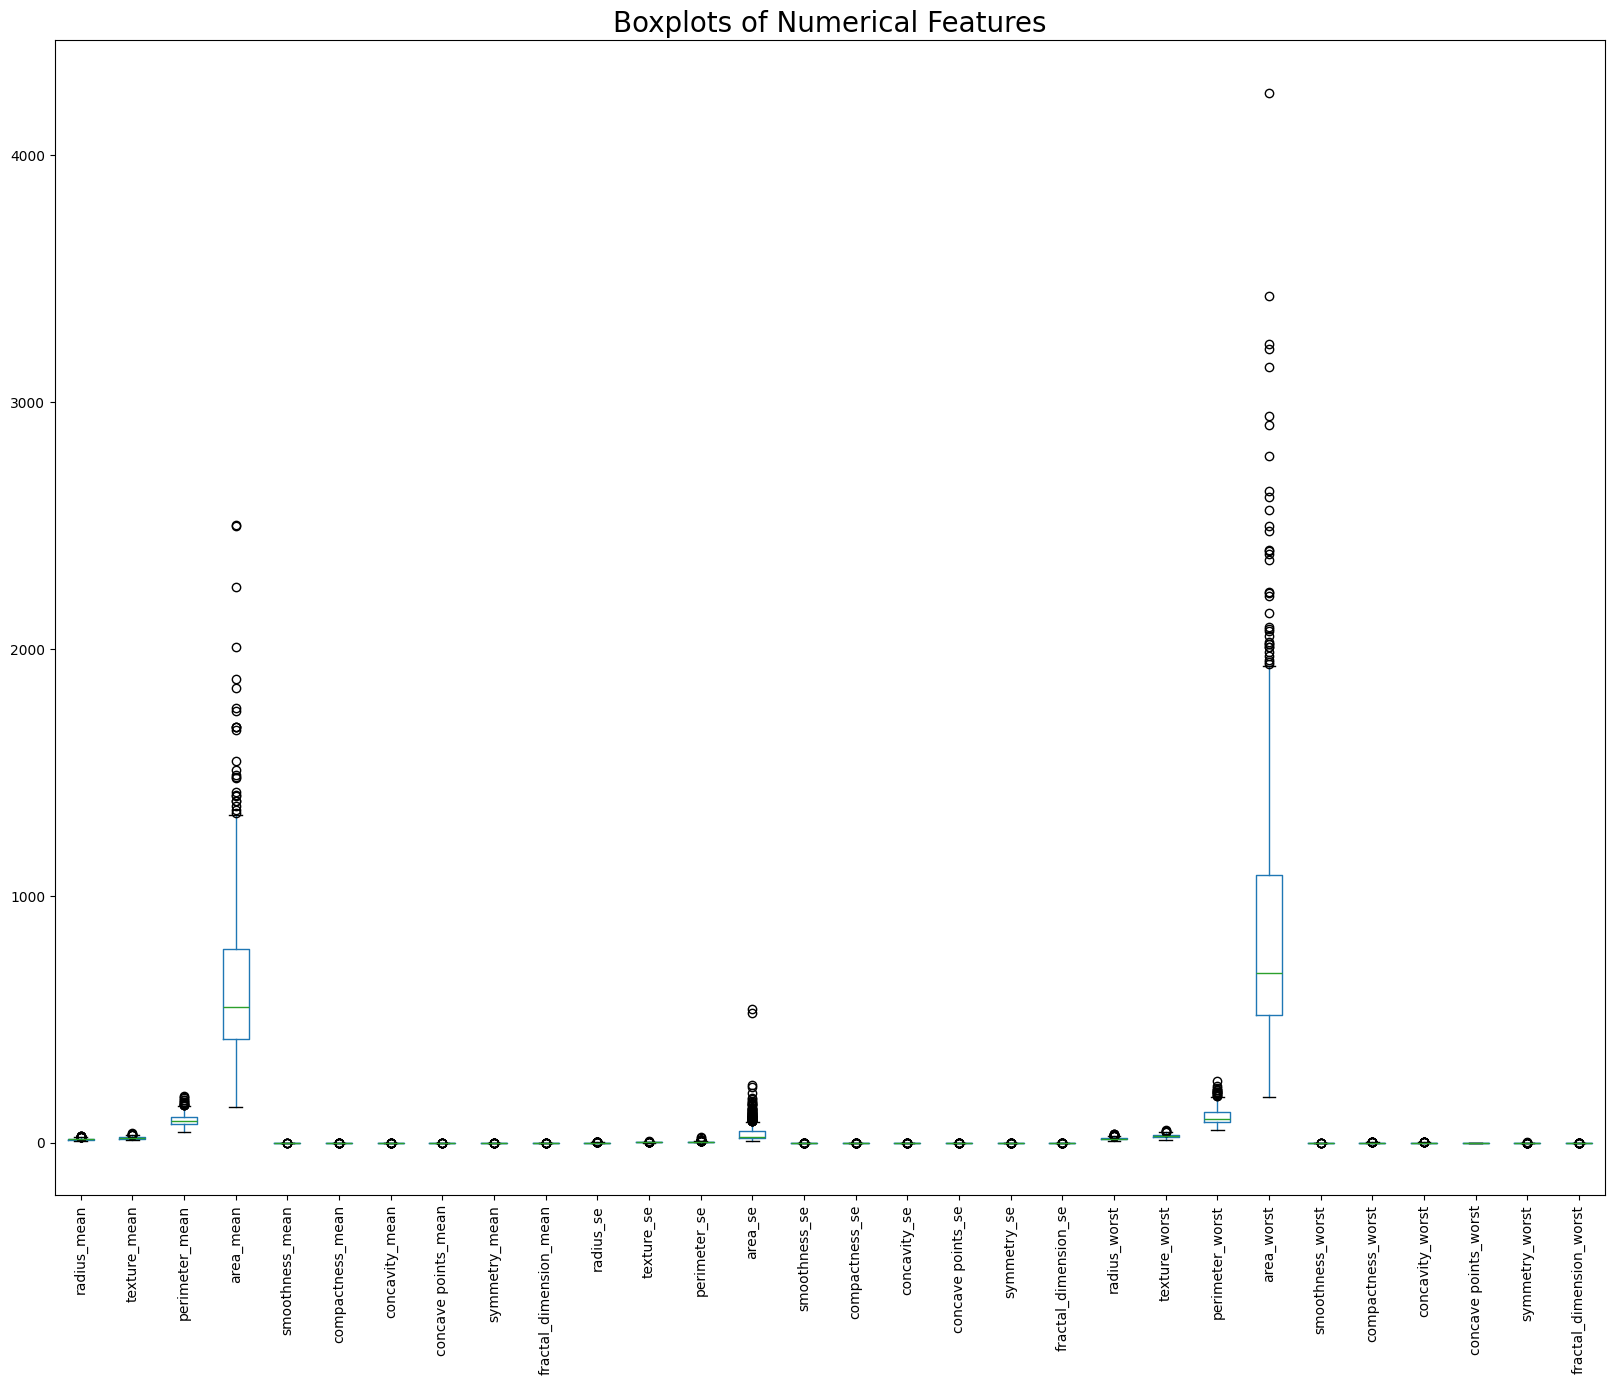

In [93]:
plt.figure(figsize=(20, 15))
df[numeric_data].boxplot(rot=90, grid=False)
plt.title("Boxplots of Numerical Features", fontsize=20)
plt.show()

In [116]:
# Q1 and Q3
Q3_perimeter = np.percentile(df['perimeter_mean'], 75)
Q1_perimeter = np.percentile(df['perimeter_mean'], 25)

# IQR
IQR_perimeter = Q3_perimeter - Q1_perimeter

# Upper and lower bounds
max_perimeter = Q3_perimeter + (1.5 * IQR_perimeter)
min_perimeter = Q1_perimeter - (1.5 * IQR_perimeter)

# Remove outliers
df = df[(df['perimeter_mean'] >= min_perimeter) & (df['perimeter_mean'] <= max_perimeter)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc20ef19ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc20ef188c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc21092abd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc20f2f8d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc20f2f9880>],
 'means': []}

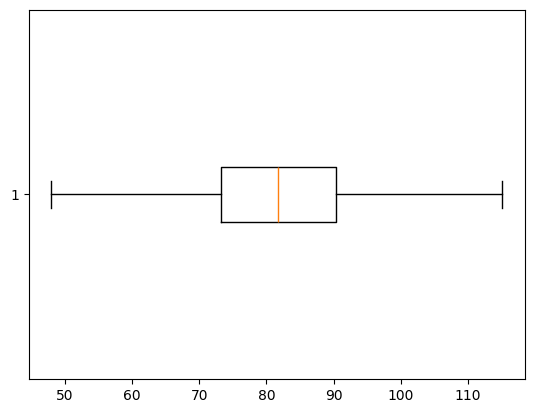

In [117]:
plt.boxplot(df['perimeter_mean'], vert = False)

In [120]:
# Q1 and Q3
Q3_area = np.percentile(df['area_mean'], 75)
Q1_area = np.percentile(df['area_mean'], 25)

# IQR
IQR_area = Q3_area - Q1_area

# Upper and lower bounds
max_area = Q3_area + (1.5 * IQR_area)
min_area = Q1_area - (1.5 * IQR_area)

# Remove outliers
df = df[(df['area_mean'] >= min_area) & (df['area_mean'] <= max_area)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc20ecf2d80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc20ecf3230>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc20ecf2a80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc20ecf36b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc20ecf3ad0>],
 'means': []}

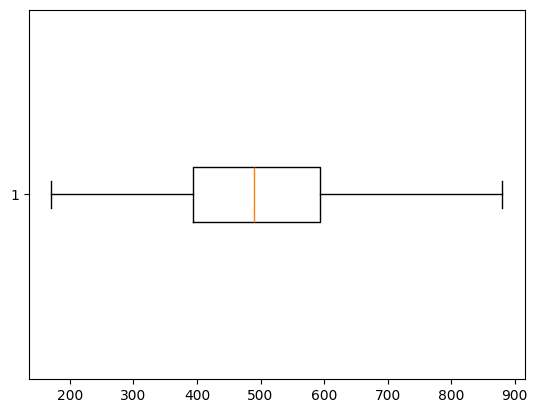

In [121]:
plt.boxplot(df['area_mean'], vert = False)

In [147]:
# Q1 and Q3
Q3_area_se = np.percentile(df['area_se'], 75)
Q1_area_se = np.percentile(df['area_se'], 25)

# IQR
IQR_area_se = Q3_area_se - Q1_area_se

# Upper and lower bounds
max_area_se = Q3_area_se + (1.5 * IQR_area_se)
min_area_se = Q1_area_se - (1.5 * IQR_area_se)

# Remove outliers
df = df[(df['area_se'] >= min_area_se) & (df['area_se'] <= max_area_se)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc20f26dd30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc20f26c2c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc20f26fd40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc20f497590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc20f495610>],
 'means': []}

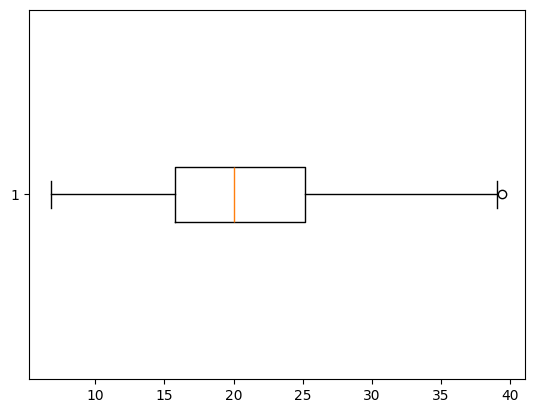

In [148]:
plt.boxplot(df['area_se'], vert = False)

In [100]:
# Q1 and Q3
Q3_perimeter_worst = np.percentile(df['perimeter_worst'], 75)
Q1_perimeter_worst = np.percentile(df['perimeter_worst'], 25)

# IQR
IQR_perimeter_worst = Q3_perimeter_worst - Q1_perimeter_worst

# Upper and lower bounds
max_perimeter_worst = Q3_perimeter_worst + (1.5 * IQR_perimeter_worst)
min_perimeter_worst = Q1_perimeter_worst - (1.5 * IQR_perimeter_worst)

# Remove outliers
df = df[(df['perimeter_worst'] >= min_perimeter_worst) & (df['perimeter_worst'] <= max_perimeter_worst)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc20f227e30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc20efd14c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc20f2277d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc20efd2cf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc20efd2fc0>],
 'means': []}

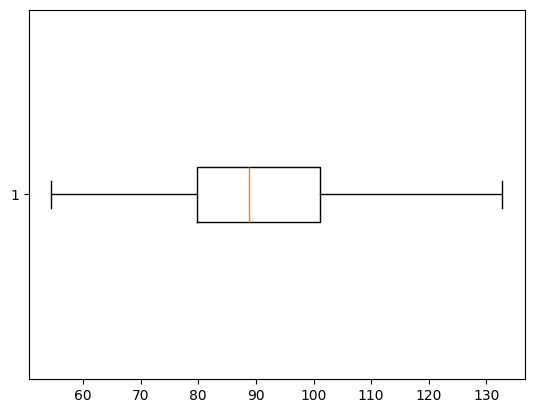

In [130]:
plt.boxplot(df['perimeter_worst'], vert = False)

In [131]:
# Q1 and Q3
Q3_area_worst = np.percentile(df['area_worst'], 75)
Q1_area_worst = np.percentile(df['area_worst'], 25)

# IQR
IQR_area_worst = Q3_area_worst - Q1_area_worst

# Upper and lower bounds
max_area_worst = Q3_area_worst + (1.5 * IQR_area_worst)
min_area_worst = Q1_area_worst - (1.5 * IQR_area_worst)

# Remove outliers
df = df[(df['area_worst'] >= min_area_worst) & (df['area_worst'] <= max_area_worst)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc20efa89b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc20efa91c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc20efa80b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc20efa9d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc20efa9b80>],
 'means': []}

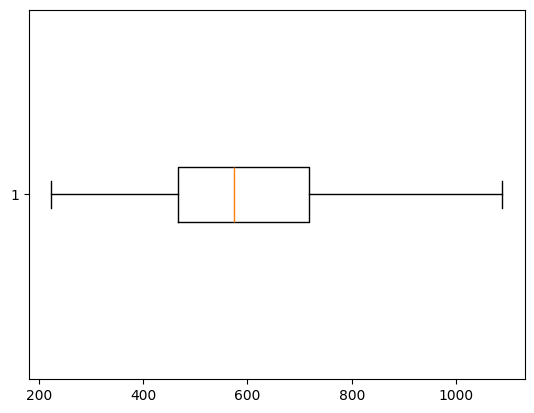

In [132]:
plt.boxplot(df['area_worst'], vert = False)

In [151]:
# Q1 and Q3
Q3_radius_worst = np.percentile(df['radius_worst'], 75)
Q1_radius_worst = np.percentile(df['radius_worst'], 25)

# IQR
IQR_radius_worst = Q3_radius_worst - Q1_radius_worst

# Upper and lower bounds
max_radius_worst = Q3_radius_worst + (1.5 * IQR_radius_worst)
min_radius_worst = Q1_radius_worst - (1.5 * IQR_radius_worst)

# Remove outliers
df = df[(df['radius_worst'] >= min_radius_worst) & (df['radius_worst'] <= max_radius_worst)]


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc20f5f0110>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc20f5f1040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc20f5f2a80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc20f5f1ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc20f5f2810>],
 'means': []}

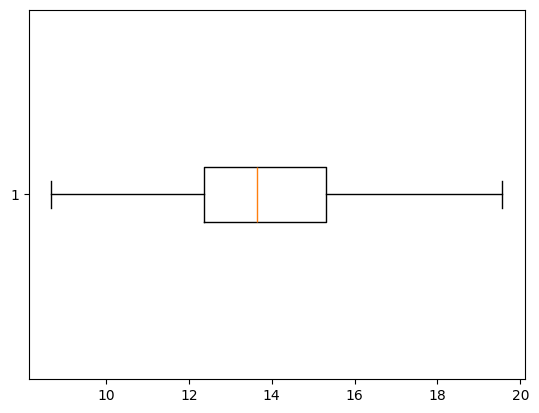

In [153]:
plt.boxplot(df['radius_worst'], vert = False)

In [154]:
# Q1 and Q3
Q3_texture_worst = np.percentile(df['texture_worst'], 75)
Q1_texture_worst = np.percentile(df['texture_worst'], 25)

# IQR
IQR_texture_worst = Q3_texture_worst - Q1_texture_worst

# Upper and lower bounds
max_texture_worst = Q3_texture_worst + (1.5 * IQR_texture_worst)
min_texture_worst = Q1_texture_worst - (1.5 * IQR_texture_worst)

# Remove outliers
df = df[(df['texture_worst'] >= min_texture_worst) & (df['texture_worst'] <= max_texture_worst)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc20f2fbd70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc20f2f9cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc20f2fae70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc20f2f9eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc20f2f80b0>],
 'means': []}

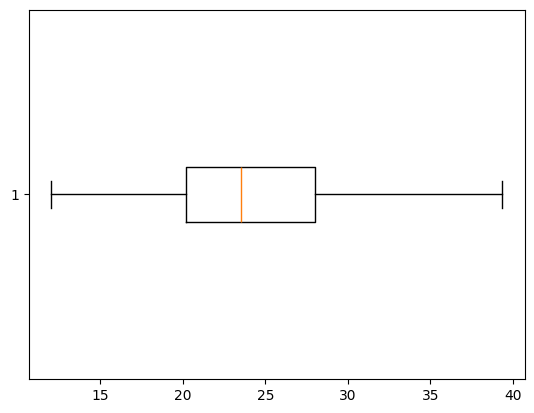

In [155]:
plt.boxplot(df['texture_worst'], vert = False)

# **Categorical Data**

In [156]:
df[categorical_data]

,diagnosis
3,M
5,M
8,M
13,M
14,M
...,...
558,B
559,B
560,B
561,B


In [157]:
df[categorical_data].value_counts()

,count
diagnosis,
B,338
M,51


# **Train & Test Split Sleep_Quality**

In [135]:
from sklearn.model_selection import train_test_split

In [158]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [159]:
# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [160]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (311, 30) (311,)
Test shape: (78, 30) (78,)


# **Scaling The Data**

In [161]:
robust_scaler = RobustScaler()
X_train[numeric_data] = robust_scaler.fit_transform(X_train[numeric_data])
X_test[numeric_data] = robust_scaler.transform(X_test[numeric_data])

In [162]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
183,-0.412632,-0.594100,-0.352319,-0.356377,-0.159911,0.062336,0.425073,-0.088626,-1.737805,0.003987,...,-0.414966,-0.709512,-0.444335,-0.398519,-0.558528,-0.171956,0.018453,-0.349646,-1.498057,-0.209141
215,0.618947,-0.185148,0.732649,0.591640,0.511602,1.379459,1.174846,1.507139,1.125000,0.932890,...,0.734694,0.476864,0.803752,0.764960,0.575251,1.864945,1.508691,1.582273,1.328671,1.362146
185,-0.972632,-0.555443,-0.960473,-0.809218,-0.043612,-0.587308,-0.788532,-1.132742,-0.103659,-0.220598,...,-0.585034,-0.262211,-0.628487,-0.522723,0.779264,-0.608118,-0.768958,-1.340500,0.245532,-0.075012
438,0.614737,0.358087,0.590725,0.665059,-0.369583,-0.280323,-0.550237,-0.122107,-0.554878,-0.718937,...,0.693878,0.615681,0.630955,0.760847,-0.568562,-0.518081,-0.566420,-0.426214,-0.407148,-0.465474
418,0.130526,-1.153611,0.105198,0.142015,-0.313112,-0.380961,-0.345057,-0.068439,-0.469512,0.081063,...,0.020408,-0.809769,0.000000,0.011516,0.086957,-0.174170,-0.335403,0.013956,0.000000,0.802782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.505263,0.000000,0.438842,0.556270,-0.781101,-0.708036,-0.418220,-0.641556,-0.500000,-0.922259,...,0.649660,0.370180,0.532708,0.719720,-0.795987,-0.797638,-0.274806,-0.559170,-0.683761,-0.787382
188,-0.244211,-0.091556,-0.244009,-0.212219,0.405368,-0.424521,-0.346468,-0.486460,-0.057927,-0.576744,...,-0.346939,0.419023,-0.422118,-0.306806,0.227425,-0.622140,-0.364430,-0.724941,0.660451,-0.631893
107,-0.012632,0.142421,-0.011204,-0.009646,-0.485323,-0.189260,-0.288018,-0.305268,-0.411585,-0.196678,...,-0.102041,0.548843,-0.126389,-0.082254,-0.347826,0.088561,0.162589,0.055068,0.323232,-0.329359
144,-0.690526,-0.583927,-0.680361,-0.606645,-0.867766,-0.503943,-0.367026,-0.863368,-1.030488,-0.699003,...,-0.557823,-0.321337,-0.509998,-0.505449,-0.709030,-0.457565,-0.316950,-0.893352,-0.738151,-0.536016


In [163]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# **Naive bayes Model**

In [164]:
from sklearn.naive_bayes import GaussianNB


NB_model = GaussianNB()

NB_model.fit(X_train_pca, y_train)

GaussianNB()

In [165]:
from sklearn.metrics import accuracy_score, classification_report


y_pred = NB_model.predict(X_test_pca)
from sklearn.metrics import classification_report, confusion_matrix
train_pred = NB_model.predict(X_train_pca)
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print(classification_report(y_test,y_pred))


Train Accuracy: 0.9517684887459807
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        68
           M       1.00      0.80      0.89        10

    accuracy                           0.97        78
   macro avg       0.99      0.90      0.94        78
weighted avg       0.98      0.97      0.97        78



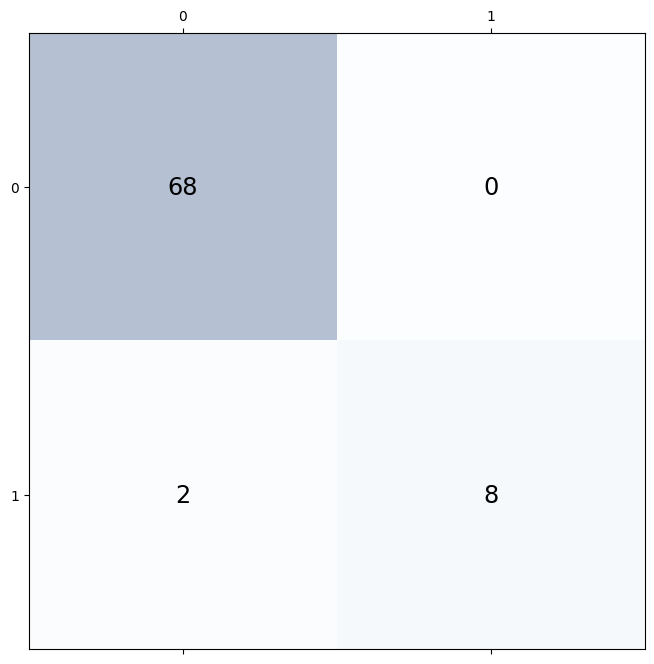

In [166]:
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.matshow(conf_matrix, cmap = plt.cm.Blues, alpha= 0.3)

for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=conf_matrix[i,j], va='center', ha = 'center', size = 'xx-large')

